
# Análise de dados de Compras de um Supermercado  

**Fonte dos dados: Kaggle<br>**
**Problema: Analisar os dados para responder diversas perguntas...**

In [2]:
from pandas import read_csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = read_csv('dados/supermarket_sales.csv')

In [198]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Dimensionalidade dos dados**

In [6]:
data.shape

(1000, 17)

**Todas as colunas**

In [7]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**Mais informações**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Respondendo as questões de negócio

### Analisando dados das vendas

**1. Qual é o total em compras médio?**

In [15]:
data['Total'].mean()

322.966749

**2. Quais foram os totais em compras mais altos e mais baixos?**

In [11]:
data['Total'].max()

1042.65

In [16]:
data['Total'].min()

10.6785

**3. Qual o volume total em vendas?**

In [39]:
data['Total'].sum()

322966.749

**4. Quais as linhas de produtos mais vendidas**

In [44]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

### Analisando dados dos clientes

**1. Quantas pessoas são da Cidade de 'Yangon'?**

In [19]:
len(data[data['City'] == 'Yangon'])

340

**2. Quantos clientes são do tipo Normal e Member?**

In [29]:
len(data[data['Customer type'] == 'Normal'])

499

In [31]:
len(data[data['Customer type'] == 'Member'])

501

In [52]:
tipo = data.groupby(['Customer type']).size()
tipo

Customer type
Member    501
Normal    499
dtype: int64

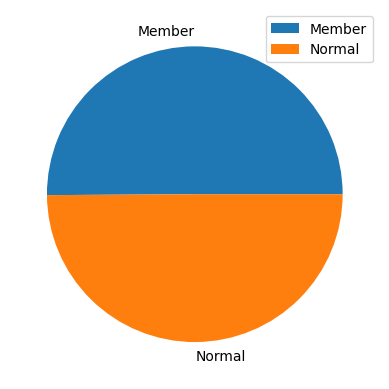

In [51]:
tipo.plot.pie(legend=True);

**3. Quantos clientes são gênero Masculino e Feminino?**

In [45]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [54]:
# Visão agrupada e com gráfico
genero = data.groupby(['Gender']).size()
genero

Gender
Female    501
Male      499
dtype: int64

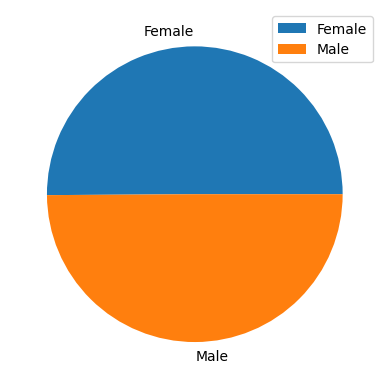

In [55]:
genero.plot.pie(legend=True);

**4. Como é o hábito de consumo por horário?**

<AxesSubplot: >

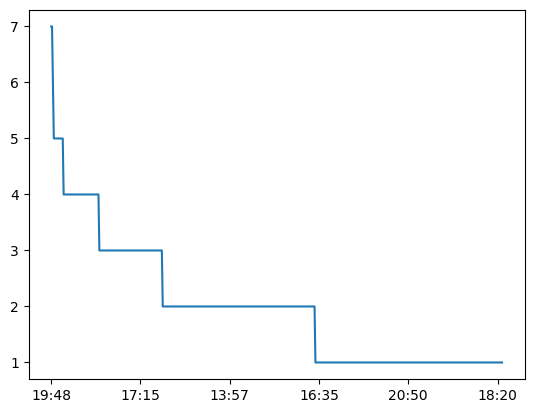

In [62]:
data['Time'].value_counts().plot()

**5. Quais são as 5 cidades mais comuns?**

In [69]:
city = data['City'].value_counts(); city

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

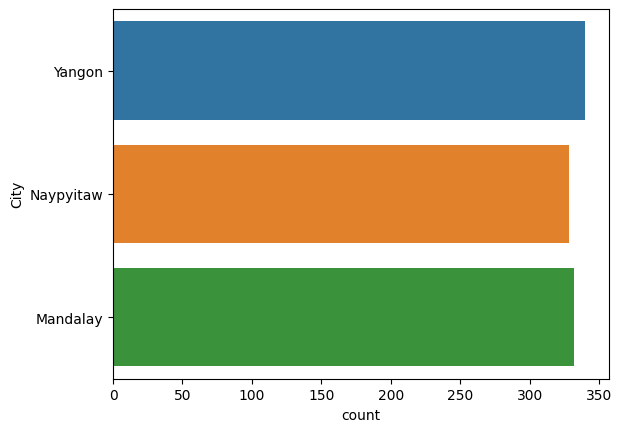

In [77]:
sns.countplot(y='City', data=data);

**6. Quais os meios de pagamento mais utilizados?**

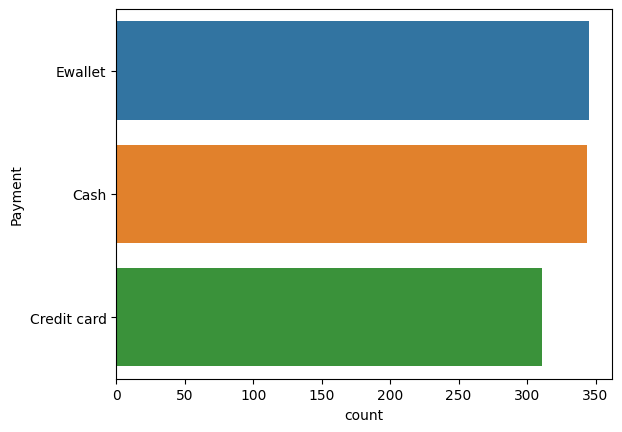

In [76]:
sns.countplot(y='Payment', data=data);

**6. Quais os dados da compra com maior total?**

In [87]:
data[data['Total'] == data['Total'].max()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6


**7. Quantas pessoas do gênero feminino compraram produto da linha Fashion accessories e fizeram uma compra acima de US $ 200?**

In [98]:
np.sum((data['Gender'] == 'Female') & (data['Total'] > 200))

312

**8. Quantas pessoas compraram às 19h?**

In [113]:
sum(data['Time'].apply(lambda x: x[:2]) == '19')

113

**9. Qual o volume de vendas por mês?**

In [126]:
data['Date'].apply(lambda x: x[-4:]).unique()

array(['2019'], dtype=object)

In [175]:
vendas_trimestre = data['Date'].apply(lambda x: x.split('/')[0]).value_counts()
vendas_trimestre.sort_index().reindex(index = ['Jan', 'Fev', 'Mar'])

Jan   NaN
Fev   NaN
Mar   NaN
Name: Date, dtype: float64

In [179]:
meses = {'1': 'Jan','2': 'Fev', '3': 'Mar'}

vendas_trimestre = data['Date'].apply(lambda x: x.split('/')[0]).map(meses).value_counts()

vendas_trimestre = vendas_trimestre.sort_index().reindex(['Jan', 'Fev', 'Mar'])
vendas_trimestre

Jan    352
Fev    303
Mar    345
Name: Date, dtype: int64

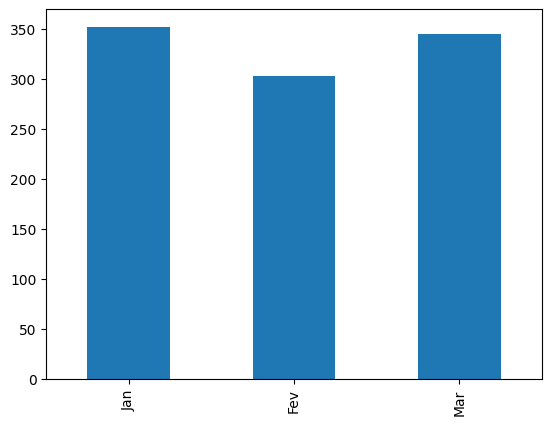

In [180]:
vendas_trimestre.plot(kind='bar');

**10. Os preços dos produtos influenciam quanto no volume de vendas?**

In [201]:
data[['Quantity', 'Unit price']].sort_values(by=['Unit price'], ascending=False).head(10).describe()

,Quantity,Unit price
count,10.000000,10.00000
mean,5.700000,99.85000
std,2.907844,0.07874
min,2.000000,99.73000
25%,2.750000,99.79750
50%,6.000000,99.82500
75%,8.500000,99.91250
max,9.000000,99.96000


<AxesSubplot: xlabel='Total', ylabel='Product line'>

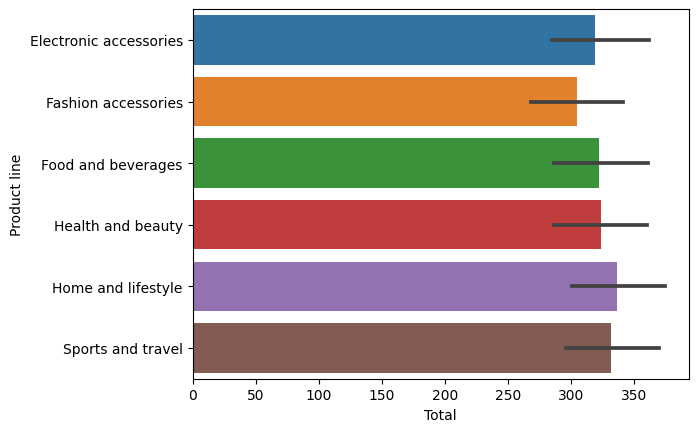

In [203]:
sns.barplot(x='Total', y='Product line', data=data.sort_values(by=['Product line']))